## Machine Learning - Ex.5


Submitted by: Dayan Liad 201048204

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### 1. Linear SVM (2-D example)

In this exercise we will use **sklearn** library's implementation of the SVM classifier:

<http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>


In [2]:
from sklearn.svm import SVC  

Use their SVC module to train a **linear** SVM classifier on the following dataset.

Set the SVC parameters with kernel='linear' and C=10000.

- Use the `predict` method to count how many examples were misclassified.

- Use the `decision_function` method to visualize decision function $Z(x_1,x_2)$ over the relevant $(x_1,x_2)$ region (using meshgrid and contour functions).

- Mark the decision boundary ($Z=0$) and the margin lines ($Z=-1$ and $Z=1$).

- Use the 'support_' attribute to mark the *support-vectors* points.

Hint: <http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html>

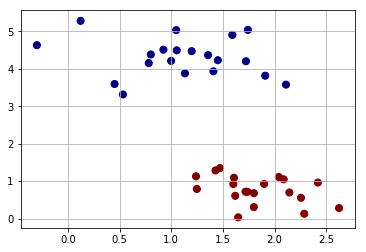

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=40, centers=2, n_features=2, random_state=0,cluster_std=0.5)
plt.scatter(X[:,0],X[:,1],50,y,cmap=plt.cm.jet)
plt.grid()
plt.show()

In [4]:
# your code here...

SVM = SVC(kernel='linear',C=10000)
SVM.fit(X,y);

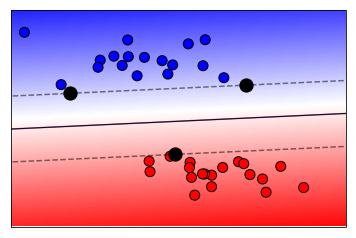

In [5]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                       np.linspace(x2_min, x2_max, 500))


Z = SVM.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.bwr)


contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1)

plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.bwr,
            edgecolors='black')

plt.scatter(SVM.support_vectors_[:, 0],
                   SVM.support_vectors_[:, 1],
                   s=150, linewidth=2,facecolors='black');

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
         linestyles=['--', '-', '--'])


plt.xticks(())
plt.yticks(())
plt.axis([0, 3, -1, 6])
plt.show()

### 2.  The hand-written DIGITS dataset

In this exercise we will try to learn the DIGITS dataset. 
The dataset contains almost 2000 examples of hand written digits:
$$y_i\in\{0,1,2,...,9\}$$


Each sample is represented by a 64 features vector (bitmap of 8x8 pixels):
$$x_i\in R^{64}$$

Lets plot a few examples from the dataset:

(1797, 64)
(1797,)


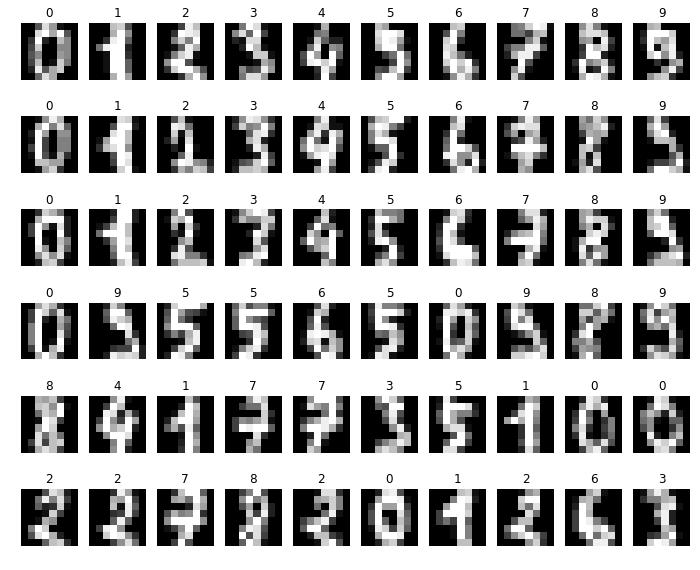

In [6]:
from sklearn import datasets

digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

plt.figure(figsize=(12,10))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.axis('off')

    plt.imshow(X[i,:].reshape(8,8),cmap='gray')
    plt.title(y[i])
plt.show()

- Extract from the full dataset only the examples of 'threes' (y=3) and 'eights' (y=8). We will use the SVM to learn a binary classifier to classify between these two categories ('three' vs 'eight').

- Use about 80% of the examples to train the SVM classifier. 

- Use the `predict` method to count how many training examples were misclassified.

- Display all the support vectors of the classifier (reshape each one to 8x8 in order to display it).

- Use the classifier over the remaining 20% examples. How many were misclassified? Display all the misclassified examples.

training examples were misclassified: 0
No of support vectors:  25


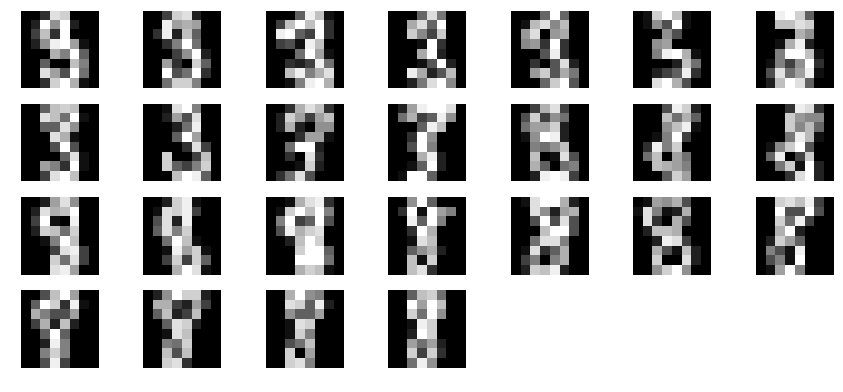

In [7]:
# your code here...
X38=X[(y==8) ^ (y==3)]
y38=y[(y==8) ^ (y==3)]

SVM = SVC(kernel='linear',C=10000)
eighty_persent=int((len(X38)/100)*80)
SVM.fit(X38[:eighty_persent],y38[:eighty_persent])

print ('training examples were misclassified:',np.sum(SVM.predict(X38[:eighty_persent])-y38[:eighty_persent]))

print ('No of support vectors: ',len(SVM.support_vectors_))
plt.figure(figsize=(15,10))
for i in range(len(SVM.support_vectors_)):
    plt.subplot(6,7,i+1)
    plt.axis('off')

    plt.imshow(SVM.support_vectors_[i].reshape(8,8),cmap='gray')
plt.show()

Number of Error on 20% dataset:  7
The % of Error = 10 %


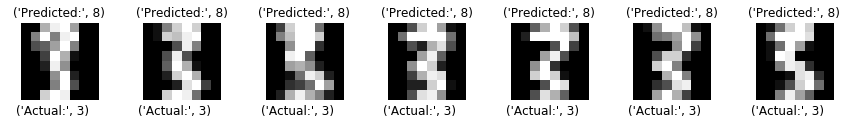

In [8]:
Predictions=SVM.predict(X38[eighty_persent:])
print ('Number of Error on 20% dataset: ',np.count_nonzero(Predictions-y38[eighty_persent:]))

twenty_persent = int(len(X38)*20/100)
total_error_persent=int(twenty_persent/np.count_nonzero(Predictions-y38[eighty_persent:]))
print ('The % of Error =',total_error_persent,'%')
Erors_predict=np.nonzero(Predictions-y38[eighty_persent:])
plt.figure(figsize=(15,10))
for i in range(len(Erors_predict[0])):
    plt.subplot(6,7,i+1)
    plt.axis('off')

    plt.imshow(X38[eighty_persent:][Erors_predict[0][i]].reshape(8,8),cmap='gray')
    plt.title(('Predicted:',Predictions[Erors_predict[0][i]]))
    plt.text(-1, 9,('Actual:',y38[eighty_persent:][Erors_predict[0][i]]),fontsize=12)
    
plt.show()

## Good luck !